Binary classification problem in which our main ojective is to be able predict if a transaction is fraudalent or not depending on severalother variables and information.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

SPACE = '-----------------------------------------------------'
NEXT_ANALYSIS = '-------------------- NEXT ANALYSIS ------------------'
folder_path = ""
path = os.getcwd()
categorical_data = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16',
                    'id_17', 'id_18', 'id_19', 'id_20', 'id_21',
                    'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
                    'id_27', 'id_28', 'id_29'] 

categorical_data_client_device_info = ['id_30', 'id_31','id_32','id_33', 'id_34','id_35', 'id_36','id_37', 'id_38','DeviceType', 'DeviceInfo']

categorical_data_cards = ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

categorical_data_domain = ['P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2']


In [2]:
def data_merge(path, set_1, set_2, data_class):
    identity = pd.read_csv(f'{folder_path}' + set_1)
    transaction = pd.read_csv(f'{folder_path}' + set_2)
    merge_data = pd.merge(identity, transaction, on='TransactionID', how = 'left')
    print (f'{data_class} dataset has {merge_data.shape[0]} rows and columns {merge_data.shape[1]}')
    return merge_data


In [3]:
train = data_merge(path,  'train_transaction.csv', 'train_identity.csv','Train') #switched order
print(f'The are {train.isnull().any().sum()} columns in train dataset with missing values')

Train dataset has 590540 rows and columns 434
The are 414 columns in train dataset with missing values


In [4]:
#train.head()
train_y = train.get(["isFraud"])
print(train_y)
'''
train = data_merge(path, 'train_identity.csv', 'train_transaction.csv', 'Train') #switched order
print(f'The are {train.isnull().any().sum()} columns in train dataset with missing values')
'''
#train_y.to_csv("train_y.csv",index=False)

        isFraud
0             0
1             0
2             0
3             0
4             0
...         ...
590535        0
590536        0
590537        0
590538        0
590539        0

[590540 rows x 1 columns]


"\ntrain = data_merge(path, 'train_identity.csv', 'train_transaction.csv', 'Train') #switched order\nprint(f'The are {train.isnull().any().sum()} columns in train dataset with missing values')\n"

In [5]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
test = data_merge(path,'test_transaction.csv','test_identity.csv', 'Test')#was train_transaction.csv
print(f'The are {test.isnull().any().sum()} columns in test dataset with missing values')

Test dataset has 506691 rows and columns 433
The are 385 columns in test dataset with missing values


In [7]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What are the meaning of these variables?

TRANSACTION TABLE
Categorical Features:
- TransactionDT: timedelta from a given reference datetime 
             (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, 
               card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be 
          associated with the payment card, etc. The actual meaning 
          is masked.
- D1-D15: timedelta, such as days between previous transaction, 
          etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, 
        counting, and other entity relations.

IDENTITY TABLE
Variables in this table are identity information – network 
connection information (IP, ISP, Proxy, etc) and digital 
signature (UA/browser/os/version, etc) associated with 
transactions.
They're collected by Vesta’s fraud protection system and digital 
security partners.
(The field names are masked and pairwise dictionary will not be 
provided for privacy protection and contract agreement)

Categorical Features:
DeviceType
DeviceInfo
id_12 - id_38

Before understanding what model to use it is important to know:
1. What type of data do we have?


In [8]:
'''
Function: explore_id01_id11(col)

Purpose: The point of this function is to be able to understand 
         the indentity information. Id_01 - Id_11 are continous
         values

Explanation:
        1. Why we use a histogram?
        
        2. Why do we count the type of parameters that these 
           cols have.

Parameters: col, string, column name

Return: True, this is just for formality   
'''
'''
def explore_contionus_data(col):
    plt.hist(train[col], bins=77)
    plt.title(f'Distribution of {col} variable')
    plt.ylabel('Quantity')
    plt.xlabel('Value Type')
    plt.show()
    print(f'Metrics for col {col}')
    print(train[col].value_counts(dropna=False, normalize=True).head())
    print('-------------------------------------')
    return True
    '''

"\ndef explore_contionus_data(col):\n    plt.hist(train[col], bins=77)\n    plt.title(f'Distribution of {col} variable')\n    plt.ylabel('Quantity')\n    plt.xlabel('Value Type')\n    plt.show()\n    print(f'Metrics for col {col}')\n    print(train[col].value_counts(dropna=False, normalize=True).head())\n    print('-------------------------------------')\n    return True\n    "

In [9]:
'''
explore_contionus_data('id_01')
explore_contionus_data('id_02')
explore_contionus_data('id_03')
explore_contionus_data('id_04')
explore_contionus_data('id_05')
explore_contionus_data('id_06')
explore_contionus_data('id_07')
explore_contionus_data('id_08')
explore_contionus_data('id_09')
explore_contionus_data('id_10')
explore_contionus_data('id_11')
'''

"\nexplore_contionus_data('id_01')\nexplore_contionus_data('id_02')\nexplore_contionus_data('id_03')\nexplore_contionus_data('id_04')\nexplore_contionus_data('id_05')\nexplore_contionus_data('id_06')\nexplore_contionus_data('id_07')\nexplore_contionus_data('id_08')\nexplore_contionus_data('id_09')\nexplore_contionus_data('id_10')\nexplore_contionus_data('id_11')\n"

In [10]:
'''
def horizontal_col_chart(y_data, x_data, col_type):
    plt.barh(y_data, x_data)
    plt.show()
    plt.title(f'Counts of {col_type}')
    plt.ylabel('Count')
    plt.xlabel(f'{col_type}')
    return True

def vertical_col_chart(y_data, x_data, col_type):
    plt.bar(y_data, x_data)
    plt.show()
    plt.title(f'Counts of {col_type}')
    plt.ylabel(f'{col_type}')
    plt.yticks(rotation=90)
    plt.xlabel('Count')
    return True
    
def explore_categorical_data(data_to_explore):
    for col in data_to_explore:
        feature_count = train[col].value_counts(dropna=False).reset_index().rename(columns={col: 'count', 'index': col})
        y_values = feature_count.iloc[:, 0] 
        y_unique_values = len(y_values.value_counts())
        y_values = [str(y_value) for y_value in y_values]
        x_values = feature_count.iloc[:, 1]
        x_unique_values = len(x_values.value_counts())
        
        if (y_unique_values <= x_unique_values):
            horizontal_col_chart(y_values, x_values, col)
        else:
            vertical_col_chart(y_values, x_values, col)
            
    return True
'''



"\ndef horizontal_col_chart(y_data, x_data, col_type):\n    plt.barh(y_data, x_data)\n    plt.show()\n    plt.title(f'Counts of {col_type}')\n    plt.ylabel('Count')\n    plt.xlabel(f'{col_type}')\n    return True\n\ndef vertical_col_chart(y_data, x_data, col_type):\n    plt.bar(y_data, x_data)\n    plt.show()\n    plt.title(f'Counts of {col_type}')\n    plt.ylabel(f'{col_type}')\n    plt.yticks(rotation=90)\n    plt.xlabel('Count')\n    return True\n    \ndef explore_categorical_data(data_to_explore):\n    for col in data_to_explore:\n        feature_count = train[col].value_counts(dropna=False).reset_index().rename(columns={col: 'count', 'index': col})\n        y_values = feature_count.iloc[:, 0] \n        y_unique_values = len(y_values.value_counts())\n        y_values = [str(y_value) for y_value in y_values]\n        x_values = feature_count.iloc[:, 1]\n        x_unique_values = len(x_values.value_counts())\n        \n        if (y_unique_values <= x_unique_values):\n            ho

In [11]:
#explore_categorical_data(categorical_data_client_device_info)

In [12]:
#explore_categorical_data(categorical_data_cards)

In [13]:
#explore_categorical_data(categorical_data_domain)

In [14]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
print(len(many_null_cols))
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]
print(len(many_null_cols_test))

12
10


In [15]:
#Get the columns that have mor ethan 90 of distinct values
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
print(len(big_top_value_cols))
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
print(len(big_top_value_cols_test))

67
79


In [16]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
print(len(one_value_cols))
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
print(len(one_value_cols_test))

0
1


In [17]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols + one_value_cols_test))
print('Cols to drop are ', len(cols_to_drop))
print(cols_to_drop)

Cols to drop are  92
['V301', 'V101', 'V290', 'V55', 'id-21', 'V286', 'isFraud', 'V68', 'V88', 'V136', 'V319', 'V66', 'V122', 'V133', 'id-25', 'V316', 'V298', 'V118', 'id_24', 'V104', 'id-23', 'V109', 'V106', 'id-24', 'V27', 'V284', 'V320', 'V110', 'V112', 'V26', 'id-26', 'id-27', 'id_25', 'V98', 'V134', 'V103', 'V28', 'V102', 'V113', 'V299', 'id_08', 'V108', 'V86', 'V135', 'V107', 'V111', 'V311', 'V281', 'V77', 'D7', 'id_07', 'V117', 'V119', 'V305', 'V129', 'V14', 'V125', 'V321', 'V123', 'V23', 'id-07', 'V65', 'V296', 'id_27', 'V120', 'id_23', 'C3', 'V89', 'V137', 'id_18', 'dist2', 'V297', 'V116', 'id-08', 'V25', 'V114', 'V121', 'V132', 'V293', 'V124', 'V295', 'V105', 'V318', 'V300', 'V24', 'id_26', 'V67', 'id-22', 'V115', 'id_21', 'V309', 'id_22']


In [18]:
for col in cols_to_drop:
    
    if col in train.columns:
        train = train.drop(col, axis = 1)
    
    if col in test.columns:
        test = test.drop(col, axis =1)
    
    else: 
        continue

# train = train.drop('V332', axis = 1)
#test = test.drop(cols_to_drop, axis = 1)

In [19]:
print(train)#print(train.columns)

        TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             2987000          86400           68.50         W  13926    NaN   
1             2987001          86401           29.00         W   2755  404.0   
2             2987002          86469           59.00         W   4663  490.0   
3             2987003          86499           50.00         W  18132  567.0   
4             2987004          86506           50.00         H   4497  514.0   
...               ...            ...             ...       ...    ...    ...   
590535        3577535       15811047           49.00         W   6550    NaN   
590536        3577536       15811049           39.50         W  10444  225.0   
590537        3577537       15811079           30.95         W  12037  595.0   
590538        3577538       15811088          117.00         W   7826  481.0   
590539        3577539       15811131          279.95         W  15066  170.0   

        card3       card4  card5   card

In [20]:
#test.to_csv("test.csv",index=False)

In [21]:
print(test.columns)

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=352)


In [22]:
# cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
#             'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
#             'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
#             'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
# for col in cat_cols:
#     if col in train.columns:
#         le = preprocessing.LabelEncoder()
#         le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
#         train[col] = le.transform(list(train[col].astype(str).values))
#         test[col] = le.transform(list(test[col].astype(str).values)) 

# X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
# y = train.sort_values('TransactionDT')['isFraud']
# #X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
# X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
# del train
# test = test[["TransactionDT", 'TransactionID']]

# def clean_inf_nan(df):
#     return df.replace([np.inf, -np.inf], np.nan)   

# # Cleaning infinite values to NaN
# X = clean_inf_nan(X)
# X_test = clean_inf_nan(X_test )

In [23]:
train["card1"] = train["card1"].fillna(0)
train["card2"] = train["card2"].fillna(0)
train["card3"] = train["card3"].fillna(0)
train["card4"] = train["card4"].fillna("NA")
train["card5"] = train["card5"].fillna(0)
train["card6"] = train["card6"].fillna("NA")
train["P_emaildomain"] = train["P_emaildomain"].fillna("NA")
train["R_emaildomain"] = train["R_emaildomain"].fillna("NA")
train["id_12"] = train["id_12"].fillna("NA")
train["id_13"] = train["id_13"].fillna("NA")
train["id_14"] = train["id_14"].fillna(0)
train["id_15"] = train["id_15"].fillna("NA")
train["id_16"] = train["id_16"].fillna("NA")
train["id_17"] = train["id_17"].fillna(0)
train["id_19"] = train["id_19"].fillna(0)
train["id_20"] = train["id_20"].fillna(0)
train["id_28"] = train["id_28"].fillna("NA")
train["id_29"] = train["id_29"].fillna("NA")
train["id_30"] = train["id_30"].fillna("NA")
train["id_31"] = train["id_31"].fillna("NA")
train["id_32"] = train["id_32"].fillna(0)
train["id_33"] = train["id_33"].fillna("NA")
train["id_34"] = train["id_34"].fillna("NA")
train["id_35"] = train["id_35"].fillna("NA")
train["id_36"] = train["id_36"].fillna("NA")
train["id_37"] = train["id_37"].fillna("NA")
train["id_38"] = train["id_38"].fillna("NA")
train["DeviceType"] = train["DeviceType"].fillna("NA")
train["DeviceInfo"] = train["DeviceInfo"].fillna("NA")
train["ProductCD"] = train["ProductCD"].fillna("NA")
train["M1"] = train["M1"].fillna("NA")
train["M2"] = train["M2"].fillna("NA")
train["M3"] = train["M3"].fillna("NA")
train["M4"] = train["M4"].fillna("NA")
train["M5"] = train["M5"].fillna("NA")
train["M6"] = train["M6"].fillna("NA")
train["M7"] = train["M7"].fillna("NA")
train["M8"] = train["M8"].fillna("NA")
train["M9"] = train["M9"].fillna("NA")
train["addr1"] = train["addr1"].fillna(0)
train["addr2"] = train["addr2"].fillna(0)


print(train)
'''train.to_csv("train.csv",index=False)
train_y.to_csv("train_y.csv",index=False)
test.to_csv("test.csv",index=False)'''


        TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             2987000          86400           68.50         W  13926    0.0   
1             2987001          86401           29.00         W   2755  404.0   
2             2987002          86469           59.00         W   4663  490.0   
3             2987003          86499           50.00         W  18132  567.0   
4             2987004          86506           50.00         H   4497  514.0   
...               ...            ...             ...       ...    ...    ...   
590535        3577535       15811047           49.00         W   6550    0.0   
590536        3577536       15811049           39.50         W  10444  225.0   
590537        3577537       15811079           30.95         W  12037  595.0   
590538        3577538       15811088          117.00         W   7826  481.0   
590539        3577539       15811131          279.95         W  15066  170.0   

        card3       card4  card5   card

'train.to_csv("train.csv",index=False)\ntrain_y.to_csv("train_y.csv",index=False)\ntest.to_csv("test.csv",index=False)'

In [24]:
'''
from xgboost import XGBRegressor, XGBClassifier #maybe split train further?
model = XGBRegressor()
model.fit(train, train_y)
prediction = model.predict_proba(test)
print(prediction)
'''
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
train1 = train#Split[0]
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29',
             'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
             'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9'
             ]

train1 = pd.get_dummies(data=train, columns=cat_cols)

for col in cat_cols:
    
    if col in train1.columns:
        train1 = train1.drop(col, axis = 1)
    else: 
        continue


In [25]:
print(train1)

        TransactionID  TransactionDT  TransactionAmt  dist1   C1   C2   C4  \
0             2987000          86400           68.50   19.0  1.0  1.0  0.0   
1             2987001          86401           29.00    NaN  1.0  1.0  0.0   
2             2987002          86469           59.00  287.0  1.0  1.0  0.0   
3             2987003          86499           50.00    NaN  2.0  5.0  0.0   
4             2987004          86506           50.00    NaN  1.0  1.0  0.0   
...               ...            ...             ...    ...  ...  ...  ...   
590535        3577535       15811047           49.00   48.0  2.0  1.0  0.0   
590536        3577536       15811049           39.50    NaN  1.0  1.0  0.0   
590537        3577537       15811079           30.95    NaN  1.0  1.0  0.0   
590538        3577538       15811088          117.00    3.0  1.0  1.0  0.0   
590539        3577539       15811131          279.95    NaN  2.0  1.0  0.0   

         C5   C6   C7  ...  M6_T  M7_F  M7_NA  M7_T  M8_F  M8_N

So run everything above up to here. Run the below cell to generate and save the model.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1, train_y, test_size=.7)
del train1, train_y
print("Be here.")
modelTrain = xgb.DMatrix(X_train, label=Y_train)

print("Be here too.")
param = {
    'eta': 0.1, 
    'max_depth': 8,  
    'objective': 'binary:logistic'} 

steps = 20
model = xgb.train(param, modelTrain, steps)
model.save_model("model.txt")

Be here.
Be here too.
[13:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


After that, restart the kernel, ignore the above cell and run this one:
(alternatively you can use the models I send you)

In [26]:
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1, train_y, test_size=.7)
del train1, train_y
print("Be here.")
model = xgb.Booster()
model.load_model("model.txt")
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_test, Y_test, test_size=.5)
del X_train, X_test, Y_train, Y_test, X_train2, Y_train2
modelTest = xgb.DMatrix(X_test2,label=Y_test2)
y_pred = pd.DataFrame(model.predict(modelTest), columns = ['isFraud'])#set back to predict
y_pred.to_csv("y_pred.csv",index=False)
Y_test2 = pd.DataFrame(Y_test2, columns = ['isFraud'])
Y_test2.to_csv("Y_test2.csv",index=False)
print("Be here too.")
model.save_model("modelTest.txt")
mse = mean_squared_error(y_pred, Y_test2)
print(mse)

Be here.


AttributeError: 'Booster' object has no attribute 'predict_proba'

In [26]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train1, train_y, test_size=.7)
del train1, train_y
print("Be here.")
model = xgb.Booster()
model.load_model("model.txt")
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_test, Y_test, test_size=.5)
del X_train, X_test, Y_train, Y_test
modelTest = xgb.DMatrix(X_test2,label=Y_test2)
model.predict(modelTest)
model.save_model("modelTest.txt")'''


Be here.


In [27]:
'''X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_test, Y_test, test_size=.5)
modelTest = xgb.DMatrix(X_test2,label=Y_test2)
model.predict(modelTest)'''


MemoryError: Unable to allocate 28.6 GiB for an array with shape (18569, 206689) and data type float64

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


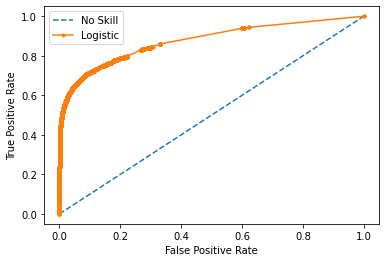

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred = pd.read_csv("y_pred.csv")
Y_test2 = pd.read_csv("Y_test2.csv")
NoSkill = [0 for _ in range(len(Y_test2))]

NoSkillScore = roc_auc_score(Y_test2, NoSkill)
ModelScore = roc_auc_score(Y_test2, y_pred)

print('No Skill: ROC AUC=%.3f' % (NoSkillScore))
print('Logistic: ROC AUC=%.3f' % (ModelScore))

ns_fpr, ns_tpr, _ = roc_curve(Y_test2, NoSkill)
lr_fpr, lr_tpr, _ = roc_curve(Y_test2, y_pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
